In [1]:
from numpy import loadtxt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.constraints import maxnorm


from sklearn.preprocessing import MinMaxScaler
import csv
import pandas as pd

from sklearn.metrics import mean_squared_error
import sklearn
print(sklearn.__version__)

Using TensorFlow backend.


0.21.3


[0.851348   0.6982241  0.9830413  0.7139565  0.95171237 0.97845054
 0.9693134  0.97286713 1.0757444  1.0336078  1.0091801  0.97092426
 1.020853   1.0477191  0.6688307  0.8108045  0.64795196 0.64795196
 0.64795196 0.66279197 0.7397804  0.66279197 0.65867865 0.6668242 ]
[7.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 4.0, 0.0] => 0.851348 (expected 0.469770)
[7.0, 6.0, 8.0, 5.0, 10.0, 2.0, 4.0, 4.0, 3.0] => 0.698224 (expected 0.433350)
[7.0, 8.0, 8.0, 5.0, 10.0, 3.0, 8.0, 7.0, 4.0] => 0.983041 (expected 0.247010)
[7.0, 6.0, 8.0, 5.0, 9.0, 2.0, 4.0, 6.0, 0.0] => 0.713956 (expected 1.612500)
[7.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 4.0, 10.0] => 0.951712 (expected 0.634590)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 10.0] => 0.978451 (expected 4.577370)
[5.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 6.0, 8.0] => 0.969313 (expected 18.685070)
[5.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 6.0, 9.0] => 0.972867 (expected 4.769060)
[3.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 10.0, 10.0] => 1.075744 (expected 5.452410)
[3.0, 8.0, 9.0, 5.

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[-2.94715613 -0.45010943 -1.8712503 ]
Results: -1.76 (1.02) MSE


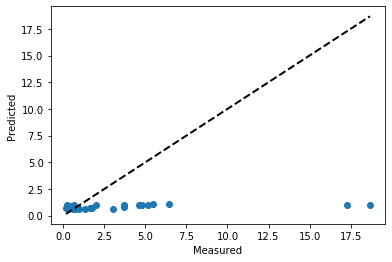

In [2]:
dataset = loadtxt('NT2006-copia.csv', delimiter=',')
X = dataset[:,3:12]
Y = dataset[:,13]
#Y = dataset[:,17]

dataset = loadtxt('NT2010-copia1.csv', delimiter=',') #sin sacar valores atípicos
X_test = dataset[:,3:12]
Y_test = dataset[:, 13]
#Y_test = dataset[:, 16]
nit = dataset[:,2]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
print(y_pred)

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     



[7.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 4.0, 0.0] => 0.839429 (expected 0.469770)
[7.0, 6.0, 8.0, 5.0, 10.0, 2.0, 4.0, 4.0, 3.0] => 0.708825 (expected 0.433350)
[7.0, 8.0, 8.0, 5.0, 10.0, 3.0, 8.0, 7.0, 4.0] => 1.010968 (expected 0.247010)
[7.0, 6.0, 8.0, 5.0, 9.0, 2.0, 4.0, 6.0, 0.0] => 0.728435 (expected 1.612500)
[7.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 4.0, 10.0] => 0.967824 (expected 0.634590)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 10.0] => 0.992264 (expected 4.577370)
[5.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 6.0, 9.0] => 1.005865 (expected 4.769060)
[3.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 10.0, 10.0] => 1.108676 (expected 5.452410)
[3.0, 8.0, 9.0, 5.0, 10.0, 1.0, 8.0, 9.0, 8.0] => 1.053187 (expected 1.959610)
[3.0, 8.0, 8.0, 5.0, 5.0, 2.0, 8.0, 10.0, 9.0] => 1.075141 (expected 3.709760)
[3.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 9.0, 8.0] => 1.042424 (expected 5.134260)
[3.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 10.0, 8.0] => 1.069843 (expected 6.445460)
[3.0, 6.0, 8.0, 5.0, 5.0, 3.0, 4.0, 7.0, 0.0] => 0.7

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


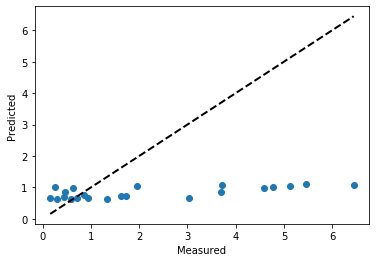

In [38]:
dataset = loadtxt('NT2006-copia.csv', delimiter=',')
X = dataset[:,3:12]
Y = dataset[:,13]
#Y = dataset[:,17]
#print(Y)

dataset = loadtxt('NT2010-copia2.csv', delimiter=',') #sacando valores muy atípicos
X_test = dataset[:,3:12]
Y_test = dataset[:, 13]
#Y_test = dataset[:, 16]
nit = dataset[:,2]
#print(X_test.dtype)
#print(Y_test)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 8.0] => 2.746399 (expected 3.220827)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 5.0] => 2.613544 (expected 2.994008)
[9.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 7.0, 9.0] => 3.037523 (expected 1.279670)
[9.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 7.0, 8.0] => 2.994863 (expected 4.694552)
[9.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 7.0, 10.0] => 3.080183 (expected 3.160192)
[7.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 7.0, 8.0] => 2.907600 (expected 0.149839)
[5.0, 6.0, 8.0, 5.0, 9.0, 1.0, 4.0, 7.0, 3.0] => 2.190812 (expected 0.090826)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 7.0, 2.0] => 2.513372 (expected 0.073090)
[7.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 7.0, 10.0] => 2.958212 (expected 0.163535)
[7.0, 8.0, 9.0, 5.0, 10.0, 2.0, 8.0, 7.0, 0.0] => 2.627898 (expected 0.538738)
[3.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 9.0, 7.0] => 2.715892 (expected 0.520790)
[3.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 9.0, 10.0] => 2.850595 (expected 0.304782)
[3.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 9.0, 5.0] => 2.660887 (

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


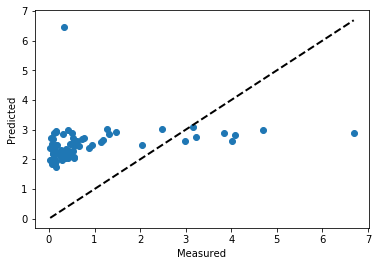

In [41]:
dataset = loadtxt('NT2010-copia1.csv', delimiter=',') #sin sacar valores atípicos
X = dataset[:,3:12]
Y = dataset[:,13]
#Y = dataset[:,17]
#print(Y)

dataset = loadtxt('NT2006-copia.csv', delimiter=',')
X_test = dataset[:,3:12]
Y_test = dataset[:, 13]
#Y_test = dataset[:, 16]
nit = dataset[:,2]
#print(X_test.dtype)
#print(Y_test)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)

for i in range(25):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

[0.28409022 0.27612007 0.30774015 0.30508345 0.31039688 0.29937792
 0.25003624 0.27210438 0.30045554 0.28465423 0.2861994  0.29416955
 0.28372985 0.24572143 0.26161352 0.27047417 0.29785568 0.30181015
 0.280886   0.29565442 0.29740816 0.2267956  0.25786835 0.26810312
 0.54618204 0.6842889  0.5804756  0.49207345 0.5177289  0.48795965
 0.5020649  0.5353555  0.5404318  0.5177289  0.6004022  0.55157644
 0.68196714 0.6585869  0.58705986 0.6281926  0.57000786 0.5579174
 0.57561564 0.57634956 0.57537353 0.60134447 0.56684756 0.5961392
 0.19873735 0.26539126 0.2219953  0.22615913 0.25325322 0.18208277
 0.18276846 0.27582306 0.2606468  0.24109143 0.19165543 0.21186593
 0.2504496  0.18419862 0.71797174 0.21160123 0.25144958 0.18822286
 0.18136778 0.20789039 0.18048778 0.26574686 0.20132467]


C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-4.7666955  -0.17508307 -4.41296291 -0.33806223 -0.26924691 -0.10995376
 -5.20513153 -0.68464667 -0.43012497 -0.2942985 ]
Results: -1.67 (2.06) MSE


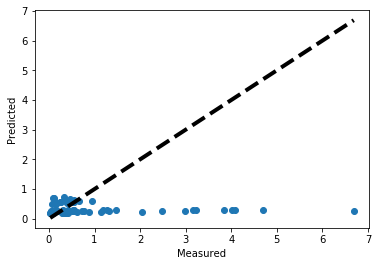

In [17]:
# la diferencia con el anterior se da en que esta tiene más de una capa oculta

dataset = loadtxt('NT2006-copia.csv', delimiter=',')
X = dataset[:,3:12]
Y = dataset[:,13]


# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=9, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
y_pred = cross_val_predict(estimator, X, Y, cv=3)
print(y_pred)
type(y_pred)

fig,ax = plt.subplots()
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

results = cross_val_score(estimator, X, Y, cv=kfold)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


[9.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 7.0, 9.0] => 1.895826 (expected 1.279670)
[3.0, 6.0, 8.0, 5.0, 9.0, 1.0, 4.0, 4.0, 0.0] => 1.090051 (expected 0.076220)
[5.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 9.0, 7.0] => 1.809889 (expected 0.502575)
[3.0, 8.0, 9.0, 5.0, 9.0, 1.0, 8.0, 9.0, 10.0] => 1.891195 (expected 3.852587)
[3.0, 6.0, 8.0, 5.0, 9.0, 2.0, 4.0, 9.0, 0.0] => 1.191506 (expected 0.556365)
[3.0, 6.0, 8.0, 5.0, 9.0, 1.0, 4.0, 7.0, 0.0] => 1.154393 (expected 0.027206)
[3.0, 8.0, 8.0, 5.0, 9.0, 3.0, 8.0, 7.0, 100.0] => 5.522203 (expected 0.340978)
[3.0, 8.0, 9.0, 5.0, 10.0, 1.0, 8.0, 9.0, 8.0] => 1.841613 (expected 1.959610)
[5.0, 6.0, 8.0, 5.0, 9.0, 1.0, 4.0, 4.0, 0.0] => 1.129613 (expected 0.116148)
[3.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 10.0, 10.0] => 1.924480 (expected 5.452410)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 10.0] => 1.847802 (expected 4.577370)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 7.0, 2.0] => 1.492121 (expected 0.073090)
[7.0, 8.0, 9.0, 5.0, 9.0, 3.0, 8.0, 7.0, 0.0] => 1.4440

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


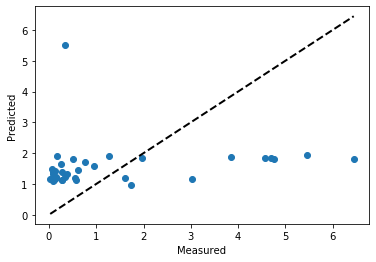

In [14]:
dataset = loadtxt('NTcompleto.csv', delimiter=',')
X = dataset[:,3:12]
Y = dataset[:,13]
nit = dataset[:,2]
#print(X)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 0)


def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
estimator.fit(X_train, Y_train)
y_pred = estimator.predict(X_test)
#y_pred = cross_val_predict(estimator, X, Y, cv=3)
for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
#print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()



[10.1917251, 5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 8.0] => 5.507449 (expected 8.882696)
[10.1917251, 5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 5.0] => 5.336320 (expected 8.882696)
[3.50608695, 9.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 7.0, 9.0] => 3.486390 (expected 3.377423)
[13.1291626, 9.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 7.0, 8.0] => 6.240939 (expected 12.647358)
[8.48593408, 9.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 7.0, 10.0] => 4.998405 (expected 8.174524)
[0.44100981, 7.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 7.0, 8.0] => 2.704968 (expected 0.428872)
[0.37100981, 5.0, 6.0, 8.0, 5.0, 9.0, 1.0, 4.0, 7.0, 3.0] => 2.057447 (expected 0.357395)
[0.26203366, 5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 7.0, 2.0] => 2.349028 (expected 0.252418)
[0.46311921, 7.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 7.0, 10.0] => 2.770709 (expected 0.446124)
[1.86209817, 7.0, 8.0, 9.0, 5.0, 10.0, 2.0, 8.0, 7.0, 0.0] => 2.651979 (expected 1.862098)
[1.6479453, 3.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 9.0, 7.0] => 2.784995 (expected 1.436283)
[0.900

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


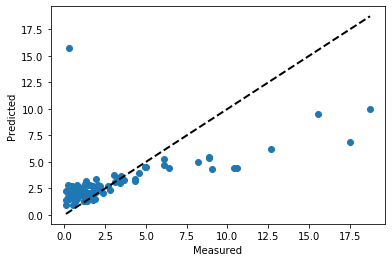

In [29]:
dataset = loadtxt('NTcompleto.csv', delimiter=',')
X = dataset[:,2:12]
Y = dataset[:,12]  
nit = dataset[:,2]
#print(X)
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 0)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=10, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10)
#estimator.fit(X_train, Y_train)
#y_pred = estimator.predict(X_test)
y_pred = cross_val_predict(estimator, X, Y, cv=10)

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X[i].tolist(), y_pred[i], Y[i]))

print(rmse(y_pred, Y))
print(corr(y_pred, Y, nit))

fig,ax = plt.subplots()
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


In [3]:
dataset = loadtxt('Vul-pred.csv', delimiter=',') #sin sacar valores atípicos
X = dataset[:,1:4]
print(X.dtype)
Y = dataset[:, 6]
nit = dataset[:,0]
print(X.dtype)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10)
#estimator.fit(X, Y)
#y_pred = estimator.predict(X_test)
y_pred = cross_val_predict(estimator, X, Y, cv=10)

for i in range(len(Y)):
	print('%s => %f (expected %f)' % (X[i].tolist(), y_pred[i], Y[i]))

print(rmse(y_pred, Y))
print(corr(y_pred, Y, nit))

fig,ax = plt.subplots()
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


ValueError: could not convert string to float: 

In [ ]:
dataset = loadtxt('NT2006-copia.csv', delimiter=',')
X = dataset[:,3:12]
Y = dataset[:,13]


# define base model
def baseline_model(activation, optimizer, init, neurons):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=9, kernel_initializer=init, activation=activation))
	model.add(Dense(neurons, kernel_initializer=init, activation=activation))
	model.add(Dense(1, kernel_initializer=init))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer=optimizer)
	return model
estimator = KerasRegressor(build_fn=baseline_model, verbose=1)

# grid search epochs, batch size
epochs = [10, 20] 
batch_size = [10, 20] # add 5, 10, 20, 40, 60, 80, 100 etc
# Use scikit-learn to grid search 
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [6, 10, 15, 18]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

parameters = {'activation':activation, 'optimizer':optimizer, 'init':init, 'epochs': epochs, 'batch_size':batch_size,
              'neurons':neurons}
grid = GridSearchCV(estimator=estimator, param_grid=parameters, n_jobs=-1)
grid_result = grid.fit(X, Y) 

##############################################################

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    